In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
# ### 2. Carga del dataset

# %%
# Cargar el archivo CSV (asegúrate de que esté en la misma carpeta o ajusta la ruta)
# El nombre del archivo debe coincidir con el que tienes, por ejemplo "COMPANY BANKRUPTCY PREDICTION.csv"
df = pd.read_csv('COMPANY BANKRUPTCY PREDICTION.csv')

# Mostrar las primeras filas para verificar
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
# ### 3. Exploración inicial

# %%
# Información general
print("Dimensiones del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())
print("\nTipos de datos:")
print(df.dtypes.value_counts())
print("\nValores nulos por columna:")
print(df.isnull().sum().sum(), "valores nulos en total")  # Ver si hay nulos

# Ver distribución de la variable objetivo
print("\nDistribución de la variable 'Bankrupt?':")
print(df['Bankrupt?'].value_counts())
print(f"Porcentaje de quiebras: {df['Bankrupt?'].mean()*100:.2f}%")

Dimensiones del dataset: (6819, 96)

Columnas:
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profi

In [5]:
# ### 4. Limpieza y preparación de datos

# %%
# Renombrar la columna objetivo para facilitar el manejo
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

# Verificar si hay valores faltantes (en este dataset probablemente no hay, pero por si acaso)
if df.isnull().any().any():
    # Imputar con la media o eliminar filas, pero mejor revisar
    df = df.dropna()  # simple, pero podríamos imputar
    print("Se eliminaron filas con valores nulos.")
else:
    print("No hay valores nulos.")

# Separar características (X) y variable objetivo (y)
X = df.drop('Bankrupt', axis=1)
y = df['Bankrupt']

No hay valores nulos.


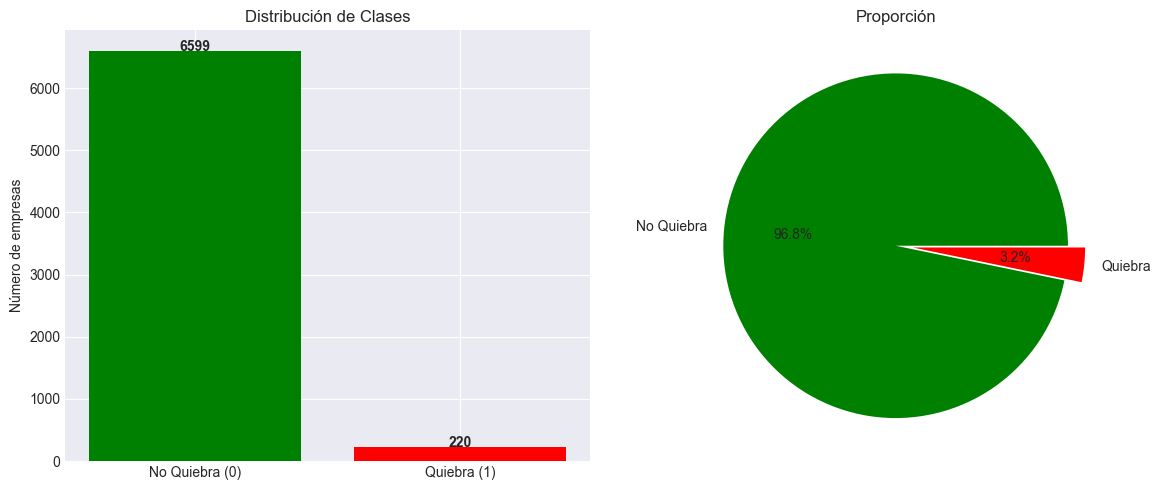

In [6]:
# ### 5. Análisis exploratorio de datos (EDA) básico

# %%
# Estadísticas descriptivas de las primeras columnas
X.describe()

# %%
# Visualizar la distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(['No Quiebra (0)', 'Quiebra (1)'], y.value_counts().values, color=['green', 'red'])
axes[0].set_title('Distribución de Clases')
axes[0].set_ylabel('Número de empresas')
for i, v in enumerate(y.value_counts().values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')
axes[1].pie(y.value_counts().values, labels=['No Quiebra', 'Quiebra'],
            colors=['green', 'red'], autopct='%1.1f%%', explode=(0, 0.1))
axes[1].set_title('Proporción')
plt.tight_layout()
plt.show()

Top 10 correlaciones positivas (aumentan riesgo de quiebra):
Debt ratio %                           0.250161
Current Liability to Assets            0.194494
Borrowing dependency                   0.176543
Current Liability to Current Assets    0.171306
Liability to Equity                    0.166812
Current Liabilities/Equity             0.153828
Current Liability to Equity            0.153828
Liability-Assets Flag                  0.139212
Total expense/Assets                   0.139049
Equity to Long-term Liability          0.139014
Name: Bankrupt, dtype: float64

Top 10 correlaciones negativas (disminuyen riesgo de quiebra):
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Persistent EPS in the Last Four Seasons                   -0.219560
Net worth/Assets                                          -0.250161
ROA(C) before interest a

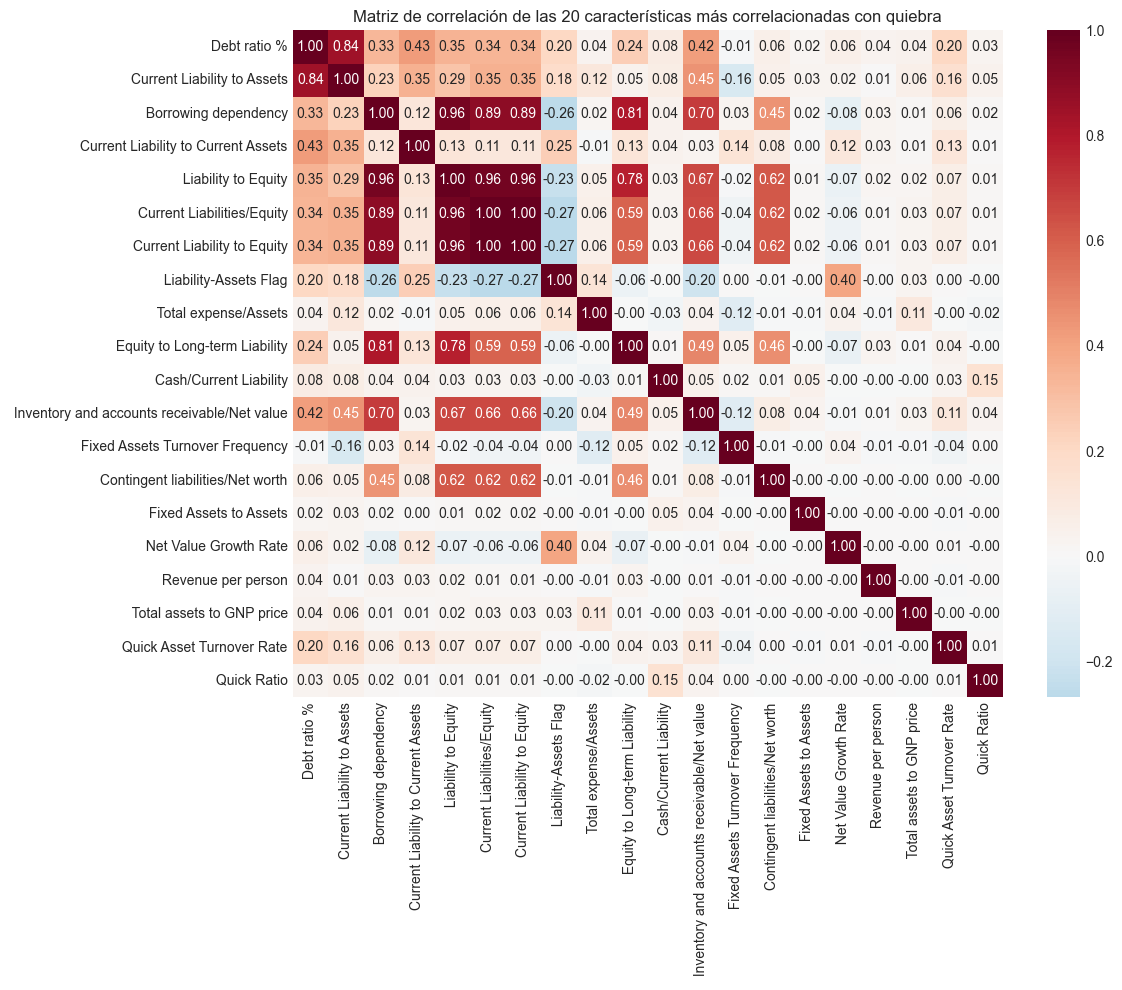

In [7]:
# ### 6. Selección de características relevantes (opcional)
# Dado que hay muchas características, podemos analizar correlaciones con la variable objetivo.

# %%
# Calcular correlación de cada característica con la variable objetivo
correlations = df.corr()['Bankrupt'].sort_values(ascending=False)
print("Top 10 correlaciones positivas (aumentan riesgo de quiebra):")
print(correlations[1:11])
print("\nTop 10 correlaciones negativas (disminuyen riesgo de quiebra):")
print(correlations[-10:])

# %%
# Visualizar matriz de correlación de las características más correlacionadas
top_features = correlations.index[1:21]  # las 20 más correlacionadas (excluyendo Bankrupt)
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Matriz de correlación de las 20 características más correlacionadas con quiebra')
plt.tight_layout()
plt.show()
